<a href="https://colab.research.google.com/github/s-kamireddy/Projects_In_AI_HW3/blob/main/CarPriceNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1:

The following is the implementation of the neural network class. I consulted this resource: https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html

Using the torch.nn libaray, we can construct a 2 layer neural network from scratch and easily and efficiently optimize the parameters with batch SGD.

Task 2

We use a neural network to predict the price of a car based on various factors such as year, model, number of owners, transmission type, etc.

Performing EDA on the dataset:

In [1]:
# import required libraries from titanic example
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

import torch
import warnings
warnings.filterwarnings("ignore")

In [2]:
#2. EDA
import kagglehub

# Download latest version
path = kagglehub.dataset_download("asinow/car-price-dataset")

print("Path to dataset files:", path)
df = pd.read_csv(path +'/car_price_dataset.csv')

Path to dataset files: /root/.cache/kagglehub/datasets/asinow/car-price-dataset/versions/1


In [3]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [4]:
df.shape
df.isna().sum()

,0
Brand,0
Model,0
Year,0
Engine_Size,0
Fuel_Type,0
Transmission,0
Mileage,0
Doors,0
Owner_Count,0
Price,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [6]:
df.describe() #dataset stats

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [7]:
df.describe(include=['O'])


,Brand,Model,Fuel_Type,Transmission
count,10000,10000,10000,10000
unique,10,30,4,3
top,Ford,Accord,Electric,Manual
freq,1048,365,2625,3372


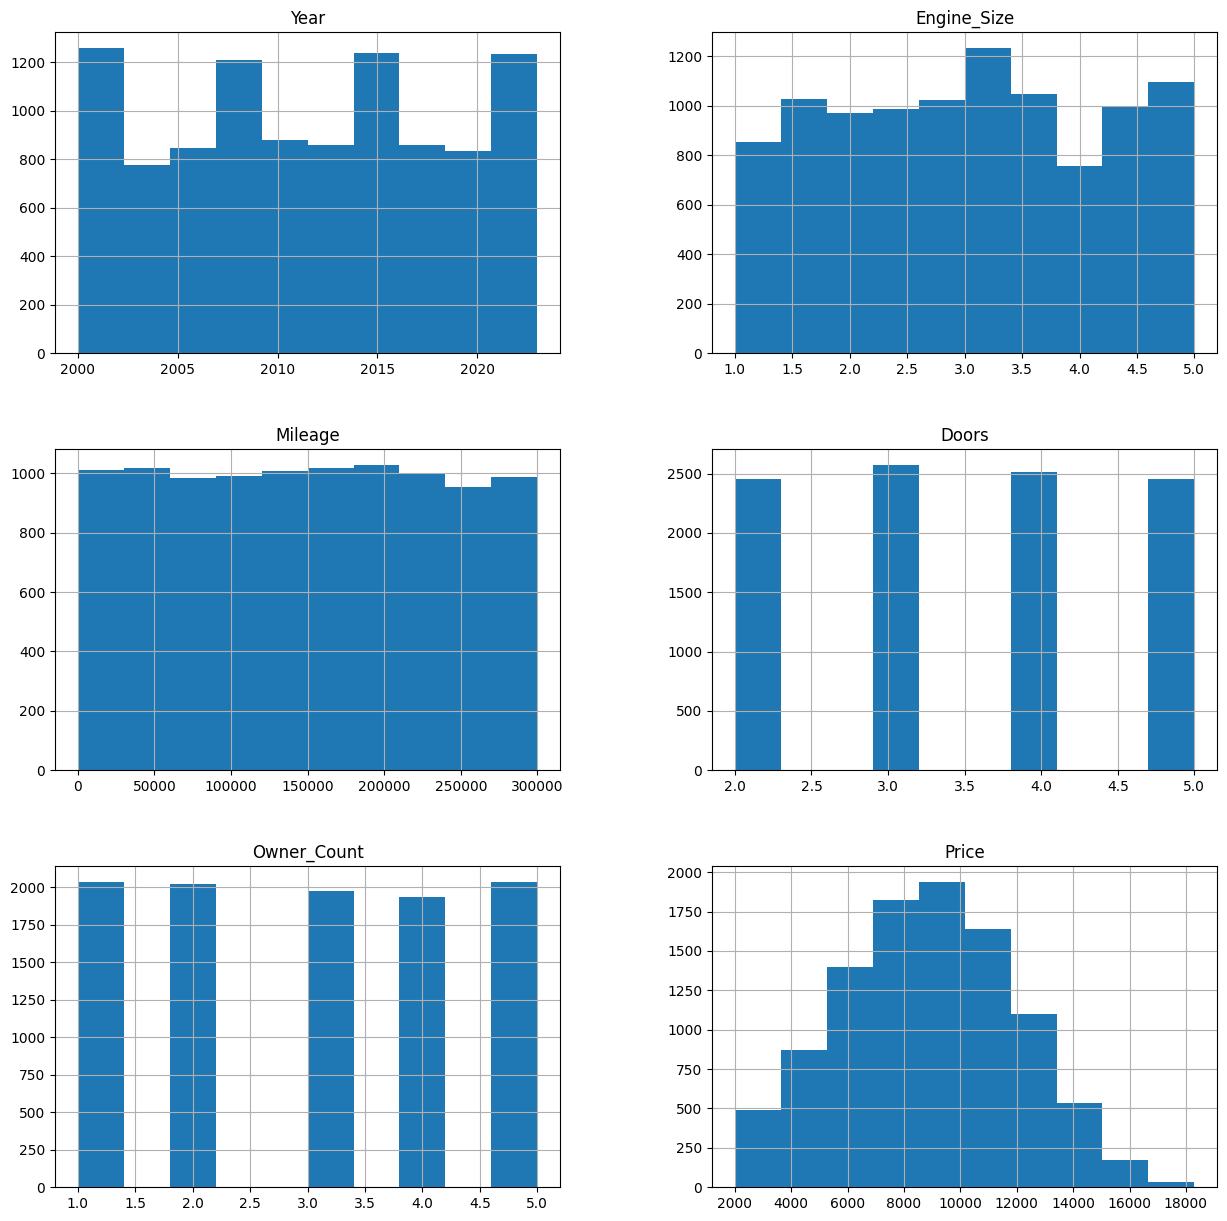

In [8]:
df.hist(figsize=(15,15))
plt.show()

In [9]:
#converting catergorical data to numeric values
df['Brand'] = df['Brand'].astype('category')
df['Brand'] = df['Brand'].cat.codes
df['Model'] = df['Model'].astype('category')
df['Model'] = df['Model'].cat.codes
df['Transmission'] = df['Transmission'].astype('category')
df['Transmission'] = df['Transmission'].cat.codes
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df['Fuel_Type'] = df['Fuel_Type'].cat.codes

        feature        VIF
0         Brand   3.762445
1         Model   4.201106
2          Year  52.124532
3   Engine_Size   9.803565
4     Fuel_Type   2.777002
5  Transmission   2.720464
6       Mileage   6.441364
7         Doors  10.933780
8   Owner_Count   5.425429
9         Price  18.007110


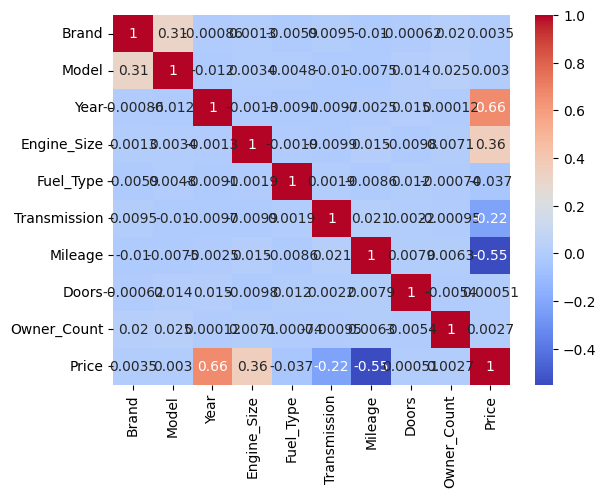

In [10]:
#colinearity
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
print(vif_data)
#high vif values indicate colinearity

#check which variables are colinear with the covariance matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Dropping the brand feature because of the high colinearity between model and brand

In [11]:
df.drop(['Brand' ], axis=1, inplace=True)
Y = df['Price'].values


train-test split

In [12]:

X = df.drop('Price', axis=1).values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Creating a normalized input and a non-normalized input to compare perfromance

In [13]:
#standardizing the data
for column in df.columns:
    df[column] = (df[column] -
                           df[column].mean()) / df[column].std()

In [14]:
X_normalized = df.drop('Price', axis=1).values
X_normalized_train, X_normalized_test, Y_train, Y_test = train_test_split(X_normalized, Y, test_size=0.2, random_state=42)

In [26]:
x_train = torch.tensor(X_train)
xn_train = torch.tensor(X_normalized_train)


y_train = torch.tensor(Y_train, dtype = torch.float64)
x_test = torch.tensor(X_test)
y_test = torch.tensor(Y_test, dtype = torch.float64)
xn_test = torch.tensor(X_normalized_test)



In [27]:
x_train = x_train.unsqueeze(1)
x_test = x_test.unsqueeze(1)
x_train.shape

torch.Size([8000, 1, 8])

In [28]:
x_train[0].shape

torch.Size([1, 8])

Initializing model

In [18]:
layers = [8, 4, 1 ]
learning_rate = 0.001

In [19]:
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [20]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        super().__init__()
        self.flatten = torch.nn.Flatten()
        self.fc1 = torch.nn.Linear(input_size, hidden_size)
        self.fc2 = torch.nn.Linear(hidden_size, output_size)
        self.relu = torch.nn.ReLU()
        self.loss_fn = torch.nn.MSELoss()
        self.lr = learning_rate
        self.optimizer = torch.optim.SGD(self.parameters(), lr=self.lr)

    def forward_prop(self, x):

      x = self.flatten(x)
      x = self.fc1(x)
      x = self.relu(x)
      x = self.fc2(x)
      return x

    def back_prop(self, y, y_hat):
        loss = self.loss_fn(y_hat, y)
        loss.backward()
        return loss.item()

    def cost(self, X, Y): #return MSE
        X = X.type(torch.float32)  # Convert input to float32
        Y = Y.type(torch.float32)

        predicted = self.forward_prop(X)
        return self.loss_fn(predicted, Y)

    def train(self, epochs,data_loader, x_train, y_train):
        losses = []
        x_train = x_train.type(torch.float32)  # Convert input to float32
        y_train = y_train.type(torch.float32)  # Convert target to float32
        num_batches = len(data_loader)

        for epoch in range(epochs):
              #print(epoch)
              batch_idx = torch.randint(0, num_batches - 1, (1,)).item()
              #print(batch_idx, epoch)


              X, y = list(data_loader)[batch_idx]

              # Compute prediction and loss
              pred = self.forward_prop(X)
              loss = self.back_prop(y, pred)

              self.optimizer.step()
              self.optimizer.zero_grad()

              if epoch % 100 == 0:
                  losses.append(self.cost(x_train, y_train).item())

        plt.plot(losses)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show()

    def test(self, data_loader):
        size = len(data_loader.dataset)
        num_batches = len(data_loader)
        test_loss, correct = 0, 0

        with torch.no_grad():
            for X, y in data_loader:
                pred = self.predict(X)
                test_loss += self.loss_fn(pred, y).item()
                correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        test_loss /= num_batches
        correct /= size
        print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    def predict(self, X):
        return self.forward_prop(X)



In [21]:
model = NeuralNetwork(8, 4, 1, learning_rate)

In [35]:
# Create TensorDataset instances
x_train = x_train.type(torch.float32)  # Convert input to float32
xn_train = xn_train.type(torch.float32)  # Convert input to float32
y_train = y_train.type(torch.float32)  # Convert target to float32
train_dataset = TensorDataset(x_train, y_train)
train_normalized_dataset = TensorDataset(xn_train, y_train)


x_test = x_test.type(torch.float32)  # Convert input to float32
xn_test = xn_test.type(torch.float32)  # Convert input to float32
y_test = y_test.type(torch.float32)  # Convert target to float32
test_dataset = TensorDataset(x_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=100, shuffle=True)
train_normalized_dataloader = DataLoader(train_normalized_dataset, batch_size=100, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=100, shuffle=True)

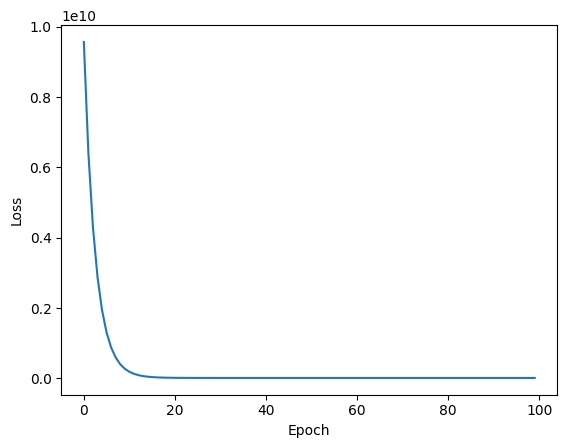

In [30]:
model.train(10000,train_dataloader,  x_train, y_train)

In [31]:
y_hat= model.predict(x_test)
print(y_hat, y_train)
percent_error = (torch.abs(y_hat - y_test) / y_test) * 100
#remove nans
percent_error = percent_error[~torch.isnan(percent_error)]
print(torch.mean(percent_error))

tensor([[8811.7705],
        [8811.7705],
        [8811.7705],
        ...,
        [8811.7705],
        [8811.7705],
        [8811.7705]], grad_fn=<AddmmBackward0>) tensor([9721., 9402., 8531.,  ..., 9317., 7997., 8784.])
tensor(36.6013, grad_fn=<MeanBackward0>)


we have a 36% avg error in prediction on the test set with non-normalized inputs

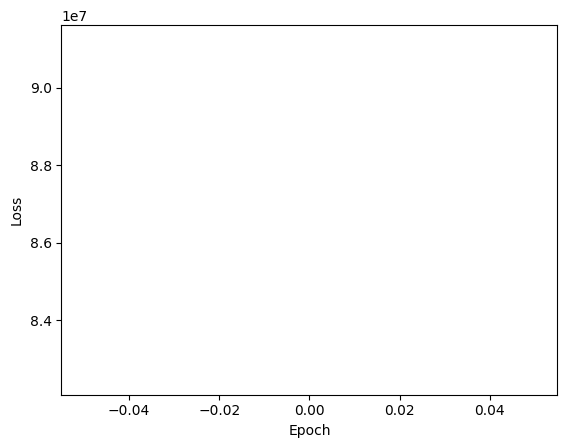

In [36]:
newmodel = NeuralNetwork(8, 4, 1, learning_rate)
newmodel.train(10000,train_normalized_dataloader,  xn_train, y_train)


As we can see, the model performns better with the non-normalized inputs, as the normalized inputs lead to NaN parameters

Normalized Vs Not Normalized

In [37]:
y_hat= newmodel.predict(x_test)
print(y_hat, y_train)
percent_error = (torch.abs(y_hat - y_test) / y_test) * 100
print("Mean percent error:", torch.mean(percent_error).item())

tensor([[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]], grad_fn=<AddmmBackward0>) tensor([9721., 9402., 8531.,  ..., 9317., 7997., 8784.])
Mean percent error: nan


Task 3

 In task 2 describe how you selected the hyperparameters. What was the rationale behind the technique you used? Did you use regularization? Why, or why not? Did you use an optimization algorithm? Why or why not?

 For this task I created a neural network with an input later of size 9, a hidden layer of size 4, and an output layer of size 1, as there were 9 input features, one target (the price), and a hidden layer of size 4 would allow the model to capture more complex relationships within the data, without overfitting to the training data the way a very large number of hidden nodes would. I selected a learning rate of 0.001 and 10000 training epochs to allow for a stable gradient descent in a reasonable amount of time.

 The optimizer I used implements the momentum/nesterov algorithm for sgd, which leads to faster convergence.

 I also used non-normalized inputs, as the normalized input scaling was leading to NaN parameters in the model

